In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
data = pd.read_csv("iris.csv")

In [42]:
print(data.head())
print(data.info())
print(data.describe())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

In [44]:
# Create a mapping for species labels
species_mapping = {i: species for i, species in enumerate(data['Species'].astype('category').cat.categories)}

In [46]:
data = data.drop(columns=['Id'])


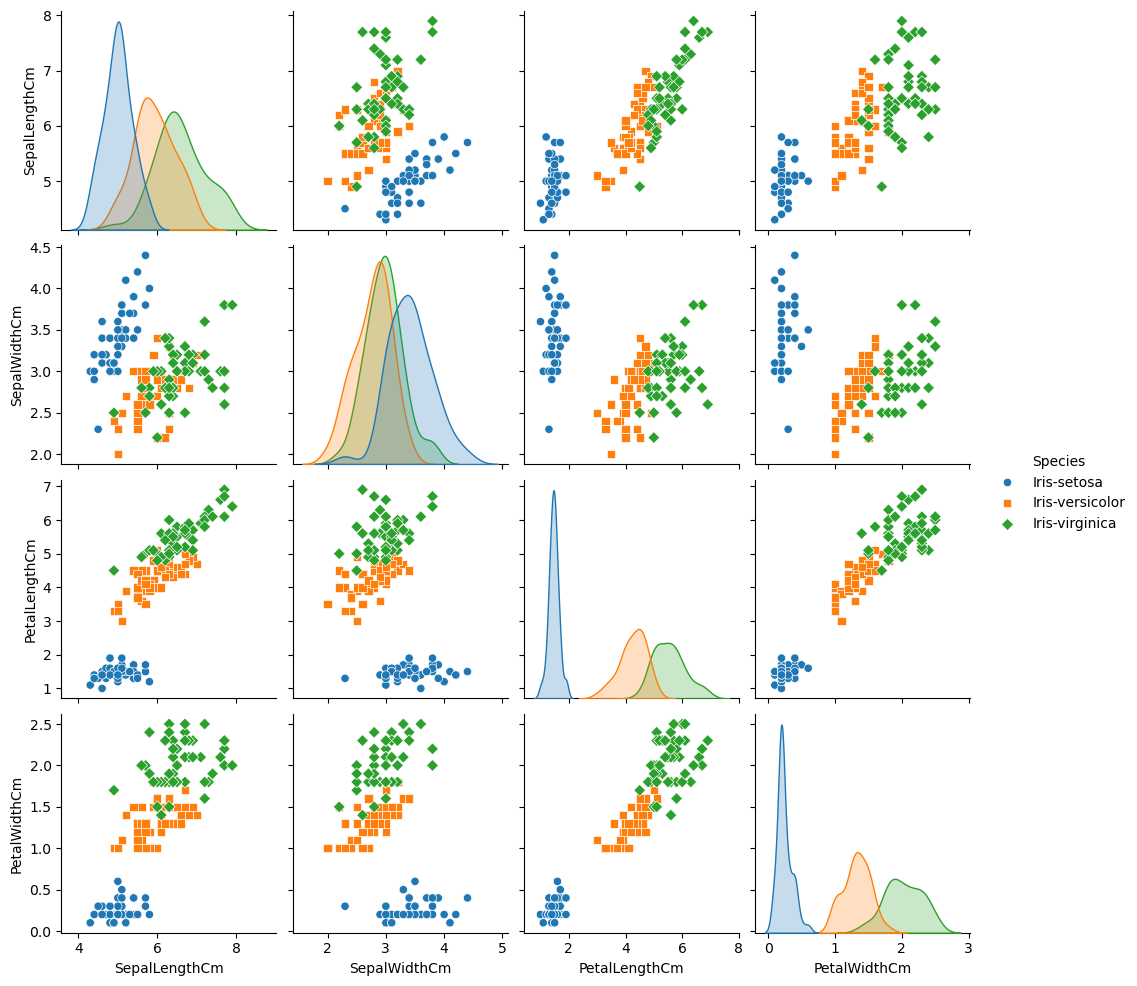

In [48]:
sns.pairplot(data, hue='Species', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

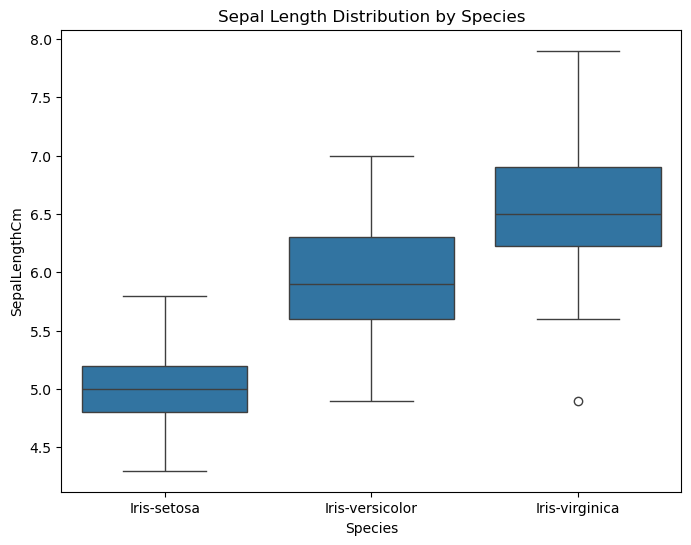

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data, x='Species', y='SepalLengthCm')
plt.title("Sepal Length Distribution by Species")
plt.show()

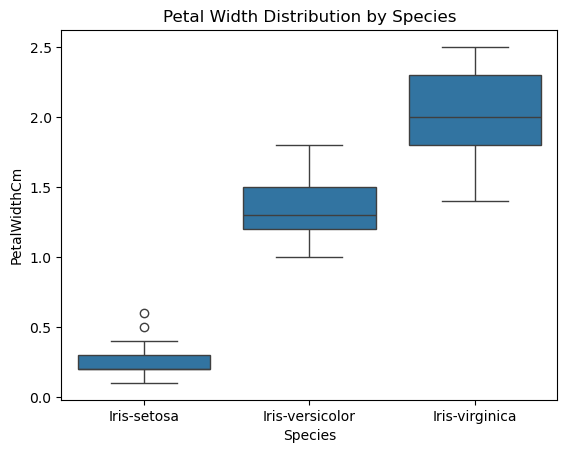

In [52]:
sns.boxplot(data, x='Species', y='PetalWidthCm')
plt.title("Petal Width Distribution by Species")
plt.show()

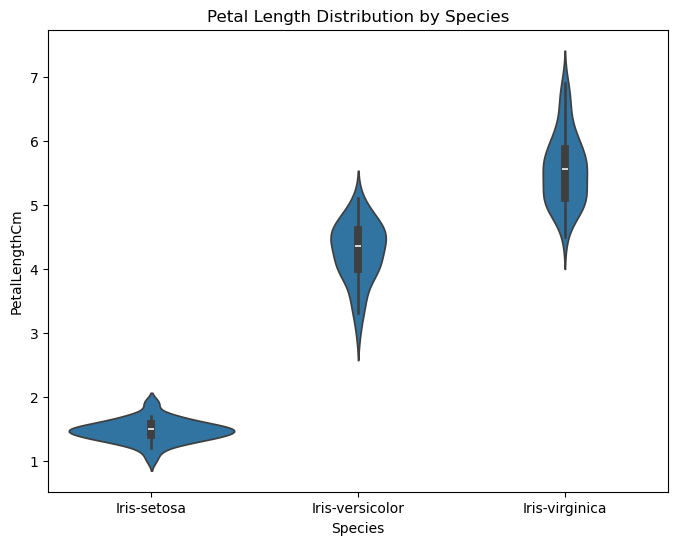

In [54]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Species', y='PetalLengthCm')
plt.title("Petal Length Distribution by Species")
plt.show()

In [58]:
data['Species'] = data['Species'].astype('category').cat.codes
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


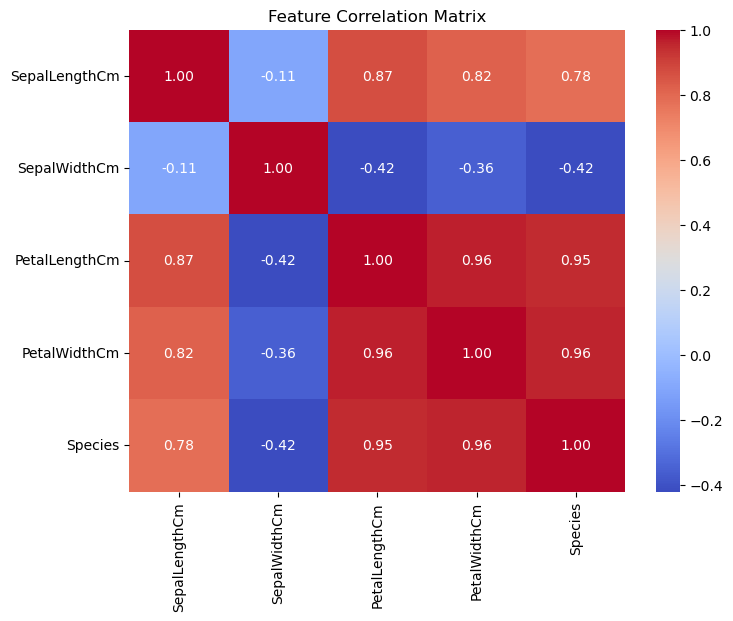

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

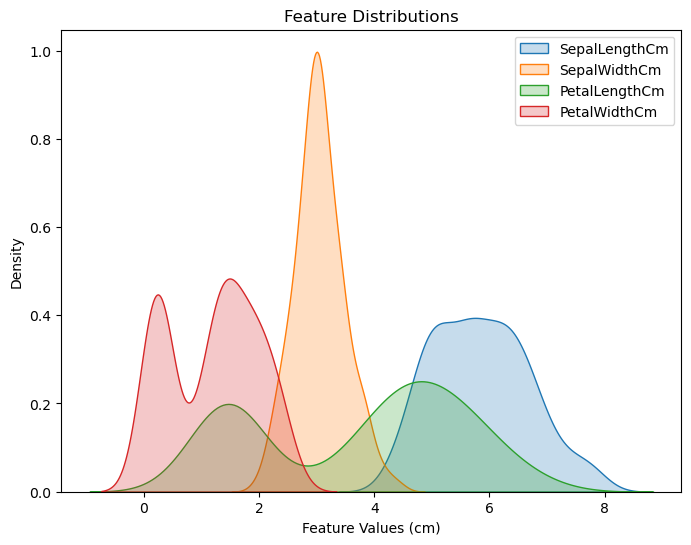

In [76]:
plt.figure(figsize=(8, 6))
for feature in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    sns.kdeplot(data[feature],fill = True, label=feature)
plt.xlabel("Feature Values (cm)")
plt.legend()
plt.title("Feature Distributions")
plt.show()

In [78]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = data['Species']  # Target variable


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [84]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_species = [species_mapping[label] for label in y_pred]


In [90]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
y_test_species = y_test.map(species_mapping)
print(classification_report(y_test_species, y_pred_species))
print(confusion_matrix(y_test,y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [92]:
import joblib

# Save the model
joblib.dump(model, 'iris_decision_tree_model.pkl')


['iris_decision_tree_model.pkl']

In [94]:
# Load the model
model = joblib.load('iris_decision_tree_model.pkl')

# Example prediction with a new sample
sample = pd.DataFrame([[5.9, 3.0, 5.1, 1.8]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
predicted_label = model.predict(sample)[0]
predicted_species_name = species_mapping[predicted_label]
print("Predicted Species:", predicted_species_name)


Predicted Species: Iris-virginica


In [96]:
sample_1 = [[5.1, 3.5, 1.4, 0.2]]
sample_2 = [[6.0, 2.9, 4.5, 1.5]]
sample_3 = [[6.9, 3.1, 5.4, 2.1]]


In [98]:
# Define samples with feature names
samples = [
    pd.DataFrame(sample_1, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']),
    pd.DataFrame(sample_2, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']),
    pd.DataFrame(sample_3, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
]

# Predict and print the species for each sample
for i, sample in enumerate(samples, 1):
    predicted_label = model.predict(sample)[0]
    predicted_species_name = species_mapping[predicted_label]
    print(f"Predicted Species for Sample {i}:", predicted_species_name)


Predicted Species for Sample 1: Iris-setosa
Predicted Species for Sample 2: Iris-versicolor
Predicted Species for Sample 3: Iris-virginica
